# ₿itcoin prices - Clustering (K-means, DBscan)

### BY: PARSA BESHARAT

In order to accomplish this purpose we need to import some Python libraries that we use as Numpy, Pandas and matplotlib to plot the diagrams.
In this part either Histograms or Scatters can be used which in this practice the scatters is being prefered. 

there is another library we must use : Sci-kit
so we have to import it

<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#setting_up_K_means">K-MEANS</a></li>
          <li><a href="#setting_up_dbscan">DBSCAN</a></li>
          <li><a href="#setting_up_HIERARCHICAL">Heriachichal</a></li>
    </ul>
</div>
<br>
<hr>


In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 
from sklearn.cluster import DBSCAN
import scipy.cluster.hierarchy as sch
import seaborn as sns
 

Here we are going to set 2 clustering algorithms : the K-MEANS and DBSCAN
and see which algorithm is better.
First we are going to test the K-means
But for now we have to read our csv file

In [38]:
file = pd.read_csv("bitcoin.csv")
df = pd.DataFrame(file)
df.head()

,MaxBuy,MinBuy,MaxSell,MinSell
0,42729.30,51792.56,34319.17,42729.30
1,35366.20,56826.13,41232.19,35366.20
2,41256.93,50003.63,42093.65,41256.93
3,41580.45,39487.36,61208.63,41580.45
4,42064.89,41733.21,62954.54,42064.89


We have just imported sns library before.Now we can use it to see plots in a better way

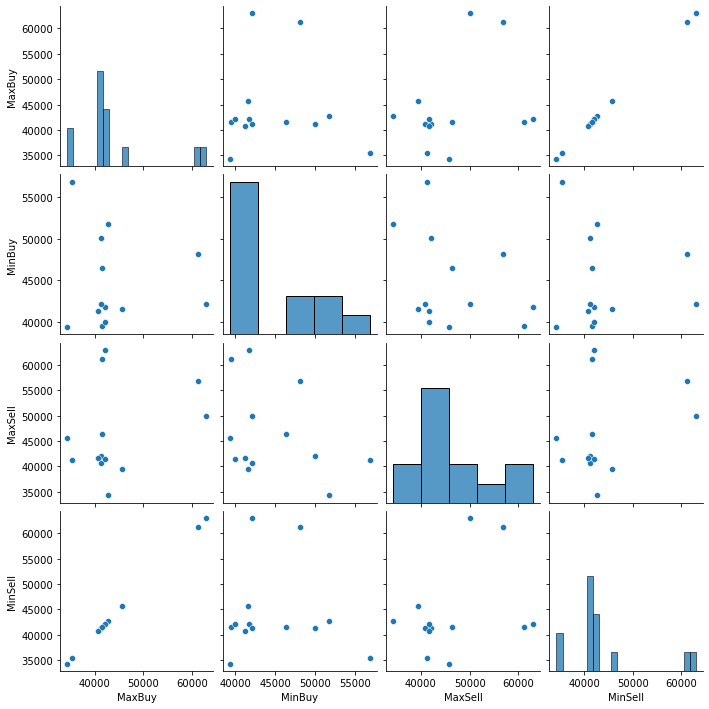

In [39]:
sns.pairplot(df)

<h2 id="setting_up_K_means">Setting up K-Means</h2>

The KMeans algorithm clusters data by trying to separate samples in some groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares. This algorithm requires the number of clusters to be specified which we can specifiy them oursleves or set the algorithm too give us the best point for clusters. It scales well to large number of samples and has been used across a large range of application areas in many different fields.

We can put the clusters in order the number of we want but it would not be accurate.

In [31]:
Kmeans = KMeans(n_clusters=5)
Kmeans.fit(df)
print(Kmeans.labels_)
print(Kmeans.cluster_centers_)

[4 4 4 3 3 1 1 1 0 0 1 1 2]
[[2.10000000e+02 6.20815850e+04 4.51190050e+04 5.34148800e+04
  6.20815850e+04]
 [2.34900000e+03 4.08164220e+04 4.08659460e+04 4.18447120e+04
  4.08164220e+04]
 [4.32000000e+04 4.15658900e+04 4.64185200e+04 4.64185200e+04
  4.15658900e+04]
 [2.25000000e+01 4.18226700e+04 4.06102850e+04 6.20815850e+04
  4.18226700e+04]
 [3.00000000e+00 3.97841433e+04 5.28741067e+04 3.92150033e+04
  3.97841433e+04]]


Here we have set the clusters to be 1 to 11. the algorithm will return the best cluster for us that we can choose.

In clustering we do not set the accuracy test for the algorithms because there is nothing to predict like classification.
We just set the algorithms and fit them to our data and see what will happen but in kmeans we can see that which number for clusters is better according to Elbow method

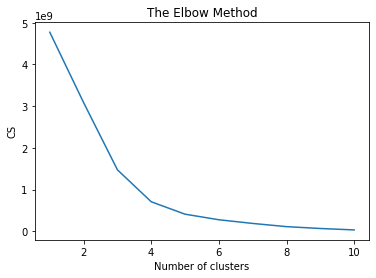

In [32]:
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

<h2 id="setting_up_dbscan">Setting up DBScan</h2>

The DBSCAN algorithm views clusters as areas of high density separated by areas of low density. Due to this rather generic view, clusters found by DBSCAN can be any shape, as opposed to k-means which assumes that clusters are convex shaped. The central component to the DBSCAN is the concept of core samples, which are samples that are in areas of high density. A cluster is therefore a set of core samples, each close to each other (measured by some distance measure) and a set of non-core samples that are close to a core sample (but are not themselves core samples). There are two parameters to the algorithm, min_samples and eps, which define formally what we mean when we say dense. Higher min_samples or lower eps indicate higher density necessary to form a cluster.

In [44]:
db=DBSCAN(eps=3,min_samples=4,metric='euclidean')
model = db.fit(df)
label=model.labels_
label

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

<h2 id="setting_up_HIERARCHICAL">HIERARCHICAL</h2>
Hierarchical clustering is a general family of clustering algorithms that build nested clusters by merging or splitting them successively. This hierarchy of clusters is represented as a tree (or dendrogram). The root of the tree is the unique cluster that gathers all the samples, the leaves being the clusters with only one sample.
The AgglomerativeClustering object performs a hierarchical clustering using a bottom up approach: each observation starts in its own cluster, and clusters are successively merged together.

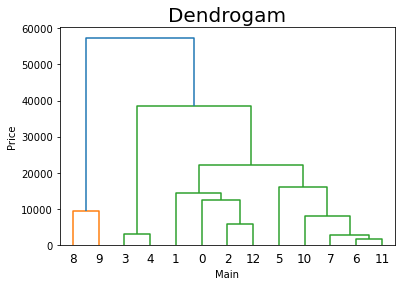

In [50]:
dendrogram = sch.dendrogram(sch.linkage(df, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Main')
plt.ylabel('Price')
plt.show()